In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
Data_File_Path = '/content/drive/My Drive/Semester 8/DSci/Ass/Ass 3/data.txt'
Data_Description_File_Path ='/content/drive/My Drive/Semester 8/DSci/Ass/Ass 3/balance-scale.names'

with open(Data_Description_File_Path) as f:
  print(f.read())

1. Title: Balance Scale Weight & Distance Database

2. Source Information: 
    (a) Source: Generated to model psychological experiments reported
		by Siegler, R. S. (1976).  Three Aspects of Cognitive
		Development.  Cognitive Psychology, 8, 481-520.
    (b) Donor: Tim Hume (hume@ics.uci.edu)
    (c) Date: 22 April 1994

3. Past Usage: (possibly different formats of this data)
   - Publications
	1. Klahr, D., & Siegler, R.S. (1978).  The Representation of
	   Children's Knowledge.  In H. W. Reese & L. P. Lipsitt (Eds.),
	   Advances in Child Development and Behavior, pp. 61-116.  New
	   York: Academic Press 
	2. Langley,P. (1987).  A General Theory of Discrimination
	   Learning.  In D. Klahr, P. Langley, & R. Neches (Eds.),
	   Production System Models of Learning and Development, pp.
	   99-161. Cambridge, MA: MIT Press
	3. Newell, A. (1990).  Unified Theories of Cognition.
	   Cambridge, MA: Harvard University Press
	4. McClelland, J.L. (1988).  Parallel Distibuted Processing:
	  

In [0]:
import pandas as pd

Data_Balance_Scale = pd.read_csv( Data_File_Path, delimiter = ',', header = None)
Data_Balance_Scale.columns = [i for i in range(0,5)]
display(Data_Balance_Scale)

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [0]:
X_Data = Data_Balance_Scale.iloc[:, 1:]
display("Data", X_Data.head())


y_Labels = Data_Balance_Scale[0]
display("Label", y_Labels.head())

'Data'

,1,2,3,4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


'Label'

0    B
1    R
2    R
3    R
4    R
Name: 0, dtype: object

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X_Data, y_Labels, test_size = 0.3, random_state = 42)

**KNN Classifier**

Finding best number of neighbors for KNN using gridSearchCV learnt from datacamp

In [0]:
from sklearn.neighbors import KNeighborsClassifier

param_Grid={'n_neighbors': range(1,11)}

KNN_Classifier = KNeighborsClassifier()
KNN_Classifier = GridSearchCV(KNN_Classifier, param_Grid)
KNN_Classifier.fit(X_Data,y_Labels)

KNN_Best_Neighbors = KNN_Classifier.best_params_

print('Optimal number of neigbors: ', KNN_Best_Neighbors)

Optimal number of neigbors:  {'n_neighbors': 9}


**KNN using train-test split data**

In [0]:
Accuracy_Scores = []
F1_Scores = []

KNN_Classifier = KNeighborsClassifier( n_neighbors= KNN_Best_Neighbors.get('n_neighbors') )

for i in range(1,11):
  X_train, X_test, y_train, y_test= train_test_split(X_Data, y_Labels, test_size= 0.3)

  KNN_Classifier.fit(X_train, y_train)
  Prediction = KNN_Classifier.predict(X_test)

  Accuracy_Scores.append( accuracy_score(y_test, Prediction) )
  F1_Scores.append( f1_score(y_test, Prediction, average= 'macro') )


**KNN using Cross validation**

In [0]:
KNN_Classifier = KNeighborsClassifier(n_neighbors= KNN_Best_Neighbors.get('n_neighbors'))
KNN_Classifier_Scores = cross_validate(KNN_Classifier, X_Data, y_Labels, cv= 10, scoring= ['accuracy','f1_macro'] )

print(KNN_Classifier_Scores['test_accuracy'].mean())
print(KNN_Classifier_Scores['test_f1_macro'].mean())

0.8209677419354838
0.5943982427609807


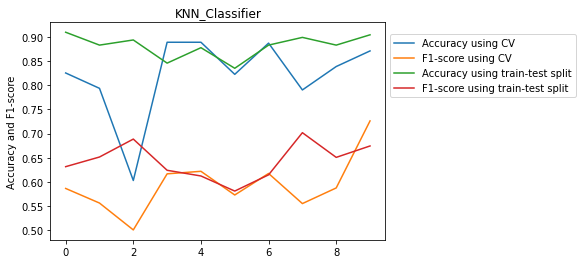

In [0]:
import matplotlib.pyplot as plt

plt.plot(KNN_Classifier_Scores['test_accuracy'], label='Accuracy using CV')
plt.plot(KNN_Classifier_Scores['test_f1_macro'], label='F1-score using CV')

plt.plot(Accuracy_Scores, label='Accuracy using train-test split')
plt.plot(F1_Scores, label='F1-score using train-test split')

plt.ylabel('Accuracy and F1-score')
plt.title('KNN_Classifier')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()


**Naive Bayes Classifier using train-test split**

In [0]:
from sklearn.naive_bayes import GaussianNB

Accuracy_Scores = []
F1_Scores = []

Naive_Bayes_Classifier = GaussianNB()

for i in range(1,11):
   X_train, X_test, y_train, y_test= train_test_split(X_Data, y_Labels, test_size= 0.3)
   
   Naive_Bayes_Classifier = Naive_Bayes_Classifier.fit(X_train, y_train)
   Prediction = Naive_Bayes_Classifier.predict(X_test)
  
   Accuracy_Scores.append( accuracy_score(y_test, Prediction) )
   F1_Scores.append( f1_score(y_test, Prediction, average= 'macro') )


**Naive Bayes Classifier using Cross validation**

In [0]:
Naive_Bayes_Classifier = GaussianNB()

Naive_Bayes_Classifier_Scores = cross_validate(Naive_Bayes_Classifier, X_Data, y_Labels, cv= 10, scoring= ['accuracy','f1_macro'])

print(Naive_Bayes_Classifier_Scores['test_accuracy'].mean())
print(Naive_Bayes_Classifier_Scores['test_f1_macro'].mean())

0.8415770609318995
0.5822386328286053


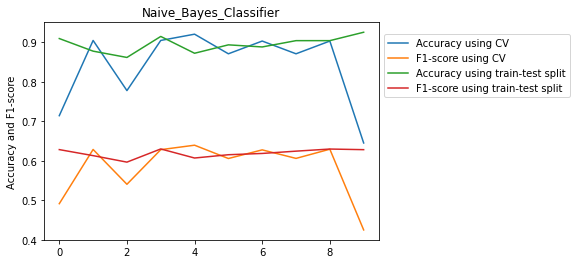

In [0]:
plt.plot(Naive_Bayes_Classifier_Scores['test_accuracy'], label='Accuracy using CV')
plt.plot(Naive_Bayes_Classifier_Scores['test_f1_macro'], label='F1-score using CV')

plt.plot(Accuracy_Scores, label='Accuracy using train-test split')
plt.plot(F1_Scores, label='F1-score using train-test split')

plt.ylabel('Accuracy and F1-score')
plt.title('Naive_Bayes_Classifier')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()


**SVM using train-test split**

In [0]:
from sklearn.svm import SVC

SVM_Classifier = SVC(C= 1.0, kernel= 'rbf')

Accuracy_Scores = []
F1_Scores = []

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X_Data, y_Labels, test_size= 0.3)

  SVM_Classifier = SVM_Classifier.fit(X_train, y_train)
  Prediction = SVM_Classifier.predict(X_test)
  
  Accuracy_Scores.append( accuracy_score(y_test, Prediction) )
  F1_Scores.append( f1_score(y_test, Prediction, average= 'macro') )



**SVM using Cross validation**

In [0]:
SVM_Classifier = SVC(C= 1.0, kernel= 'rbf')

SVM_Classifier_Scores = cross_validate(SVM_Classifier, X_Data, y_Labels, cv=10, scoring = ['accuracy','f1_macro'])

print(SVM_Classifier_Scores['test_accuracy'].mean())
print(SVM_Classifier_Scores['test_f1_macro'].mean())

0.8688940092165899
0.6031098688126378


**SVM Using Chi-Square Metric**

In [0]:
from sklearn.metrics.pairwise import chi2_kernel

SVM_Classifier = SVC(kernel= chi2_kernel)

Accuracy_Scores_Chi_Square = []
F1_Scores_Chi_Square = []

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X_Data, y_Labels, test_size= 0.3)

  SVM_Classifier = SVM_Classifier.fit(X_train, y_train)
  Prediction = SVM_Classifier.predict(X_test)

  Accuracy_Scores_Chi_Square.append( accuracy_score(y_test, Prediction) )
  F1_Scores_Chi_Square.append( f1_score(y_test, Prediction, average= 'macro') )


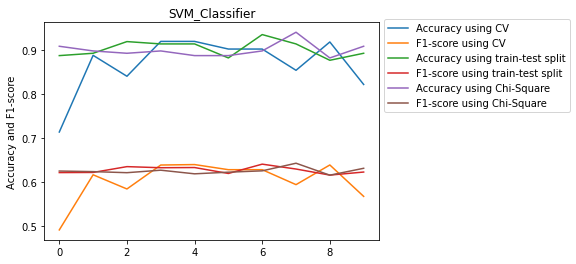

In [0]:
plt.plot(SVM_Classifier_Scores['test_accuracy'], label='Accuracy using CV')
plt.plot(SVM_Classifier_Scores['test_f1_macro'], label='F1-score using CV')

plt.plot(Accuracy_Scores, label='Accuracy using train-test split')
plt.plot(F1_Scores, label='F1-score using train-test split')

plt.plot(Accuracy_Scores_Chi_Square, label='Accuracy using Chi-Square')
plt.plot(F1_Scores_Chi_Square, label='F1-score using Chi-Square')

plt.ylabel('Accuracy and F1-score')
plt.title('SVM_Classifier')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()


**Decision tree**

Train test split

In [0]:

from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Classifier = DecisionTreeClassifier(random_state=0)

Accuracy_Scores = []
F1_Scores = []

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X_Data, y_Labels, test_size=0.3)

  Decision_Tree_Classifier = Decision_Tree_Classifier.fit(X_train, y_train)
  Prediction = Decision_Tree_Classifier.predict(X_test)
  
  Accuracy_Scores.append(accuracy_score(y_test, Prediction))
  F1_Scores.append(f1_score(y_test, Prediction, average= 'macro'))



Cross validation

In [0]:
Decision_Tree_Classifier = DecisionTreeClassifier(random_state=0)

Decision_Tree_Classifier_Scores = cross_validate(Decision_Tree_Classifier, X_Data, y_Labels, cv= 10, scoring= ['accuracy','f1_macro'])

print(Decision_Tree_Classifier_Scores['test_accuracy'].mean())
print(Decision_Tree_Classifier_Scores['test_f1_macro'].mean())

0.6704301075268816
0.4989487530522216


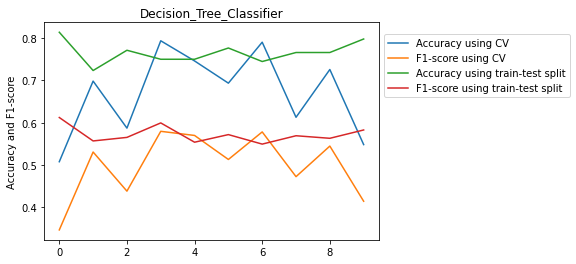

In [0]:
plt.plot(Decision_Tree_Classifier_Scores['test_accuracy'], label='Accuracy using CV')
plt.plot(Decision_Tree_Classifier_Scores['test_f1_macro'], label='F1-score using CV')

plt.plot(Accuracy_Scores, label='Accuracy using train-test split')
plt.plot(F1_Scores, label='F1-score using train-test split')

plt.ylabel('Accuracy and F1-score')
plt.title('Decision_Tree_Classifier')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()